# Yeast dataset

We use ensembl paralogs where locus map with uniprot

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data, load and merge

In [127]:
# File path of datasets (require third party data)
fn_pairs = Path('/Users/olivierdennler/Documents/data/SLI_2023/yeast_559292/ensembl_paralogs/ens111_yeastR64-1-1_paralog_pairs_formated.txt').resolve()
fn_CONT_features_pairs = Path('/Users/olivierdennler/Documents/data/SLI_2023/yeast_559292/ensembl_paralogs/cont-struct-Yeast-ensembl-scores.csv').resolve()
fn_seq_features_pairs = Path('/Users/olivierdennler/Documents/data/SLI_2023/yeast_559292/ensembl_paralogs/cont-seq-Yeast-ensembl-scores.csv').resolve()
fn_esm2_pairs = Path('/Users/olivierdennler/Documents/data/SLI_2023/yeast_559292/ensembl_paralogs/embeddings/chumby/yeast_esm2_embeddings_pair_distances.csv').resolve()
fn_ProtT5_pairs = Path('/Users/olivierdennler/Documents/data/SLI_2023/yeast_559292/ensembl_paralogs/embeddings/protT5_ensembl_yeast_embeddings_distances.csv').resolve()
fn_interactome_pairs = Path('/Users/olivierdennler/Documents/data/SLI_2023/paralog_SL_prediction-master/local_data/processed/paralog_features/yeastSocialInteractome_ppi_features.csv').resolve()

# Build dataframes from input files and merge them

# First merge with biogrid data
paralog_pairs = pd.read_csv(fn_pairs, sep=',')
paralog_pairs = paralog_pairs.rename(columns={"min_seq_id": "min_sequence_identity"})
print('Num pairs:', paralog_pairs.shape[0])
interactome_data = pd.read_csv(fn_interactome_pairs, sep=',')
print('PPI annotated pairs:', interactome_data.shape[0])
# Merge with the main dataset
# Creating sorted merge keys in biogrid_data
paralog_pairs = pd.merge(paralog_pairs, interactome_data, how='left', on='sorted_gene_pair', suffixes=('', '_y'))
paralog_pairs.drop(paralog_pairs.filter(regex='_y$').columns, axis=1, inplace=True)
depmap_pairs = paralog_pairs.drop_duplicates(subset='sorted_gene_pair')

    
# Context-wise annotations
cont_paralog_annotations = pd.read_csv(fn_CONT_features_pairs, sep=',', on_bad_lines='skip', float_precision="round_trip", keep_default_na=False, na_values=['','NaN','None','NA_hit','NA_aln'])
cont_paralog_annotations = cont_paralog_annotations.drop_duplicates()
print('Context-Wise annotated pairs:', cont_paralog_annotations.shape[0])

# Sequence Context-wise annotations
seq_cont_paralog_annotations = pd.read_csv(fn_seq_features_pairs, float_precision="round_trip", keep_default_na=False, na_values=['','NaN','None','NA_hit','NA_aln'])
seq_cont_paralog_annotations = seq_cont_paralog_annotations.drop_duplicates()
print('Sequence Context-Wise annotated pairs:', seq_cont_paralog_annotations.shape[0])

# ESM2 embedding distances annotations
esm2_paralog_annotations = pd.read_csv(fn_esm2_pairs, keep_default_na=False)
print('ESM2 distances annotated pairs:', esm2_paralog_annotations.shape[0])

# ProtT5 embedding distances annotations
protT5_paralog_annotations = pd.read_csv(fn_ProtT5_pairs, keep_default_na=False)
print('ProtT5 (Uniprot) distances annotated pairs:', protT5_paralog_annotations.shape[0])



# Merging
print('Num pairs (before merging):', paralog_pairs.shape[0])

paralog_pairs = pd.merge(paralog_pairs, cont_paralog_annotations, how='left', on='sorted_gene_pair', suffixes=('', '_y'))
paralog_pairs.drop(paralog_pairs.filter(regex='_y$').columns, axis=1, inplace=True)
print('Num pairs (after merging with struct. context. annot.):', paralog_pairs.shape[0])

paralog_pairs = pd.merge(paralog_pairs, seq_cont_paralog_annotations, how='left', on='sorted_gene_pair', suffixes=('', '_y'))
paralog_pairs.drop(paralog_pairs.filter(regex='_y$').columns, axis=1, inplace=True)
print('Num pairs (after merging with seq. context. annot.):', paralog_pairs.shape[0])

paralog_pairs = pd.merge(paralog_pairs, esm2_paralog_annotations, how='left', on='sorted_gene_pair', suffixes=('', '_y'))
paralog_pairs.drop(paralog_pairs.filter(regex='_y$').columns, axis=1, inplace=True)
print('Num pairs (after merging with ESM2):', paralog_pairs.shape[0])

paralog_pairs = pd.merge(paralog_pairs, protT5_paralog_annotations, how='left', on='sorted_gene_pair', suffixes=('', '_y'))
paralog_pairs.drop(paralog_pairs.filter(regex='_y$').columns, axis=1, inplace=True)
print('Num pairs (after merging with ProtT5):', paralog_pairs.shape[0])

paralog_pairs

Num pairs: 5673
PPI annotated pairs: 5673
Context-Wise annotated pairs: 5673
Sequence Context-Wise annotated pairs: 5673
ESM2 distances annotated pairs: 5673
ProtT5 (Uniprot) distances annotated pairs: 5673
Num pairs (before merging): 5673
Num pairs (after merging with struct. context. annot.): 5673
Num pairs (after merging with seq. context. annot.): 5673
Num pairs (after merging with ESM2): 5673
Num pairs (after merging with ProtT5): 5673


,A1_ensembl,A2_ensembl,sequence_identity,min_sequence_identity,max_seq_id,closest,family_size,family_id,sorted_gene_pair,A1_entrez,...,esm2_mean_of_residue_tokens_manhattan,esm2_mean_of_residue_tokens_ts_ss,esm2_mean_of_special_tokens_cosine,esm2_mean_of_special_tokens_euclidean,esm2_mean_of_special_tokens_manhattan,esm2_mean_of_special_tokens_ts_ss,ProtT5_per-protein_cosine,ProtT5_per-protein_euclidean,ProtT5_per-protein_manhattan,ProtT5_per-protein_ts_ss
0,YBR024W,YBR037C,0.541528,0.541528,0.552542,True,2,0,YBR024W_YBR037C,YBR024W,...,93.511767,0.096595,0.008058,1.411498,80.550856,0.106887,0.029297,0.3308,8.430,0.000158
1,YDL245C,YDR387C,0.194004,0.194004,0.198198,False,27,1,YDL245C_YDR387C,YDL245C,...,250.078556,2.541134,0.042646,3.256135,185.206191,1.230387,0.262695,0.8000,20.220,0.002695
2,YDL245C,YDR497C,0.185185,0.179795,0.185185,False,27,1,YDL245C_YDR497C,YDL245C,...,246.790340,2.610289,0.018737,2.173424,124.051172,0.376788,0.123047,0.5312,13.550,0.000636
3,YDL245C,YOL103W,0.194004,0.180624,0.194004,False,27,1,YDL245C_YOL103W,YDL245C,...,256.149012,2.915442,0.019074,2.193044,124.862082,0.386858,0.125000,0.5723,14.336,0.000867
4,YDL245C,YDL138W,0.206349,0.153342,0.206349,False,27,1,YDL138W_YDL245C,YDL245C,...,266.571797,3.170808,0.031929,2.840615,160.882494,0.863985,0.231934,0.8200,18.950,0.003847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,YBR241C,YDR387C,0.223361,0.196396,0.223361,False,27,1,YBR241C_YDR387C,YBR241C,...,203.742788,1.247919,0.077436,4.375505,245.431182,3.242177,0.146973,0.6167,15.766,0.001147
5669,YBR241C,YHR094C,0.227459,0.194737,0.227459,False,27,1,YBR241C_YHR094C,YBR241C,...,217.702378,1.803404,0.098224,4.945581,275.126656,5.020137,0.290527,0.8345,21.270,0.002908
5670,YDR243C,YMR290C,0.178571,0.178571,0.207921,False,23,62,YDR243C_YMR290C,YDR243C,...,199.150311,1.372035,0.050141,3.589591,202.139155,1.762479,0.430176,1.1030,27.500,0.008509
5671,YNL331C,YDL243C,0.813830,0.813830,0.930091,True,10,196,YDL243C_YNL331C,YNL331C,...,69.609969,0.038085,0.066646,4.096792,233.556090,2.673592,0.016113,0.2267,5.707,0.000039


## Features post treatment for Context-Wise
i.e., reduction of the 2 ways in 1 feature

For each pair of features (like A1_A2_rank and A2_A1_rank), we want to create a new feature that contains the minimum value of the two. This process should eliminate 'NA_hit' values from the new features, assuming that every row has at least one valid value in each pair of features.

This transformation will create the new features rank, selfSP, taxid, bits, id_percent, and alntmscore.

In [128]:
# Convert the columns to numeric
for column in paralog_pairs.columns:
    paralog_pairs[column] = pd.to_numeric(paralog_pairs[column], errors='ignore')

# Create new features as the minimum of pairs
paralog_pairs['rank_struct'] = paralog_pairs[['A1_A2_rank_struct', 'A2_A1_rank_struct']].min(axis=1)
paralog_pairs['selfSP_struct'] = paralog_pairs[['A1_nb_human_struct', 'A2_nb_human_struct']].min(axis=1)
paralog_pairs['taxid_struct'] = paralog_pairs[['A1_nb_taxid_struct', 'A2_nb_taxid_struct']].min(axis=1)
paralog_pairs['bits_struct'] = paralog_pairs[['A1_bits_struct', 'A2_bits_struct']].min(axis=1)
paralog_pairs['fident_struct'] = paralog_pairs[['A1_fident_struct', 'A2_fident_struct']].min(axis=1)
paralog_pairs['alnlen_struct'] = paralog_pairs[['A1_alnlen_struct', 'A2_alnlen_struct']].min(axis=1)
paralog_pairs['evalue_struct'] = paralog_pairs[['A1_evalue_struct', 'A2_evalue_struct']].min(axis=1)
paralog_pairs['alntmscore_struct'] = paralog_pairs[['A1_alntmscore_struct', 'A2_alntmscore_struct']].min(axis=1)
paralog_pairs['qtmscore_struct'] = paralog_pairs[['A1_qtmscore_struct', 'A2_qtmscore_struct']].min(axis=1)
paralog_pairs['ttmscore_struct'] = paralog_pairs[['A1_ttmscore_struct', 'A2_ttmscore_struct']].min(axis=1)
paralog_pairs['prob_struct'] = paralog_pairs[['A1_prob_struct', 'A2_prob_struct']].min(axis=1)
paralog_pairs['lddt_struct'] = paralog_pairs[['A1_lddt_struct', 'A2_lddt_struct']].min(axis=1)

# Create new features as the minimum of pairs
paralog_pairs['rank_seq'] = paralog_pairs[['A1_A2_rank_seq', 'A2_A1_rank_seq']].min(axis=1)
paralog_pairs['selfSP_seq'] = paralog_pairs[['A1_nb_selfSP_seq', 'A2_nb_selfSP_seq']].min(axis=1)
paralog_pairs['taxid_seq'] = paralog_pairs[['A1_nb_taxid_seq', 'A2_nb_taxid_seq']].min(axis=1)
paralog_pairs['bits_seq'] = paralog_pairs[['A1_A2_bits_seq', 'A2_A1_bits_seq']].min(axis=1)
paralog_pairs['id_percent_seq'] = paralog_pairs[['A1_A2_id_percent_seq', 'A2_A1_id_percent_seq']].min(axis=1)
paralog_pairs['evalue_seq'] = paralog_pairs[['A1_A2_evalue_seq', 'A2_A1_evalue_seq']].min(axis=1)

# Let's check the first few rows of the dataset again
paralog_pairs


,A1_ensembl,A2_ensembl,sequence_identity,min_sequence_identity,max_seq_id,closest,family_size,family_id,sorted_gene_pair,A1_entrez,...,qtmscore_struct,ttmscore_struct,prob_struct,lddt_struct,rank_seq,selfSP_seq,taxid_seq,bits_seq,id_percent_seq,evalue_seq
0,YBR024W,YBR037C,0.541528,0.541528,0.552542,True,2,0,YBR024W_YBR037C,YBR024W,...,0.7171,0.7312,1.0,0.8500,1.0,0.0,0.0,332.0,0.592,2.037000e-102
1,YDL245C,YDR387C,0.194004,0.194004,0.198198,False,27,1,YDL245C_YDR387C,YDL245C,...,0.6916,0.7016,1.0,0.6671,207.0,23.0,69.0,95.0,0.213,4.216000e-22
2,YDL245C,YDR497C,0.185185,0.179795,0.185185,False,27,1,YDL245C_YDR497C,YDL245C,...,0.7361,0.7472,1.0,0.6879,88.0,15.0,32.0,166.0,0.281,2.459000e-41
3,YDL245C,YOL103W,0.194004,0.180624,0.194004,False,27,1,YDL245C_YOL103W,YDL245C,...,0.7092,0.7488,1.0,0.6961,69.0,13.0,25.0,175.0,0.302,5.226000e-46
4,YDL245C,YDL138W,0.206349,0.153342,0.206349,False,27,1,YDL138W_YDL245C,YDL245C,...,0.6178,0.8076,1.0,0.7737,32.0,16.0,7.0,227.0,0.310,3.130000e-61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,YBR241C,YDR387C,0.223361,0.196396,0.223361,False,27,1,YBR241C_YDR387C,YBR241C,...,0.6821,0.7583,1.0,0.6683,145.0,15.0,48.0,114.0,0.270,3.176000e-25
5669,YBR241C,YHR094C,0.227459,0.194737,0.227459,False,27,1,YBR241C_YHR094C,YBR241C,...,0.6639,0.7387,1.0,0.6391,122.0,9.0,42.0,117.0,0.268,2.163000e-27
5670,YDR243C,YMR290C,0.178571,0.178571,0.207921,False,23,62,YDR243C_YMR290C,YDR243C,...,0.5736,0.6433,1.0,0.6343,513.0,10.0,141.0,165.0,0.314,3.152000e-44
5671,YNL331C,YDL243C,0.813830,0.813830,0.930091,True,10,196,YDL243C_YNL331C,YNL331C,...,0.8711,0.9939,1.0,0.9091,1.0,0.0,0.0,634.0,0.930,3.378000e-207


# Define function and features

### Features choice and drop NaN features

In [129]:
# Choice of features to use
features = ['rank_struct', 'selfSP_struct', 'taxid_struct', 
            'fident_struct', 'bits_struct', 'alntmscore_struct', 'qtmscore_struct','ttmscore_struct',
            'alnlen_struct', 'evalue_struct', 'prob_struct', 'lddt_struct',
            'rank_seq', 'selfSP_seq', 'taxid_seq', 'bits_seq', 'id_percent_seq', 'evalue_seq',
            'esm2_beginning_of_sequence_cosine','esm2_beginning_of_sequence_euclidean','esm2_beginning_of_sequence_manhattan',
            'esm2_end_of_sequence_manhattan','esm2_end_of_sequence_ts_ss','esm2_mean_of_residue_tokens_cosine',
            'esm2_beginning_of_sequence_ts_ss','esm2_end_of_sequence_cosine','esm2_end_of_sequence_euclidean',
            'esm2_mean_of_residue_tokens_euclidean','esm2_mean_of_residue_tokens_manhattan','esm2_mean_of_residue_tokens_ts_ss',
            'esm2_mean_of_special_tokens_cosine','esm2_mean_of_special_tokens_euclidean','esm2_mean_of_special_tokens_manhattan',
            'esm2_mean_of_special_tokens_ts_ss',
            'ProtT5_per-protein_cosine', 'ProtT5_per-protein_euclidean', 'ProtT5_per-protein_manhattan', 'ProtT5_per-protein_ts_ss',
            ]

print(f"Initial number of rows in paralog pair table: {paralog_pairs.shape[0]}")
# Ensure that all feature names are in depmap_pairs columns
assert all(feature in paralog_pairs.columns for feature in features), "Some features are not in depmap_pairs columns"

# Calculate rows_with_nan before any dropna operation
rows_with_nan = paralog_pairs[features].isna().any(axis=1)
# Store these rows separately
rows_to_discard = paralog_pairs[rows_with_nan]
# Print the number of rows with NaN
print(f"Number of rows with NaN: {len(rows_to_discard)}")

nan_distribution = paralog_pairs[features].isna().sum()
nan_distribution_with_values = nan_distribution[nan_distribution > 0]
print(nan_distribution_with_values)

# Drop rows with NaN in depmap_pairs
paralog_pairs = paralog_pairs.dropna(subset=features)

# Print the number of rows after dropping NaN
print(f"Number of rows after dropping NaN: {paralog_pairs.shape[0]}")



Initial number of rows in paralog pair table: 5673
Number of rows with NaN: 1565
rank_struct           330
selfSP_struct         330
taxid_struct          330
fident_struct         330
bits_struct           330
alntmscore_struct     330
qtmscore_struct       330
ttmscore_struct       330
alnlen_struct         330
evalue_struct         330
prob_struct           330
lddt_struct           330
rank_seq             1407
selfSP_seq           1407
taxid_seq            1407
bits_seq             1407
id_percent_seq       1407
evalue_seq           1407
dtype: int64
Number of rows after dropping NaN: 4108


In [130]:
# All news sequences and structures features to model sequence divergence + min. sequence identity
news_features = ['min_sequence_identity',
                'rank_struct', 'selfSP_struct', 'taxid_struct', 
                'fident_struct', 'bits_struct', 'alntmscore_struct', 'qtmscore_struct','ttmscore_struct',
                'alnlen_struct', 'evalue_struct', 'prob_struct', 'lddt_struct',
                'rank_seq', 'selfSP_seq', 'taxid_seq', 
                'esm2_beginning_of_sequence_cosine','esm2_beginning_of_sequence_euclidean','esm2_beginning_of_sequence_manhattan',
                'esm2_beginning_of_sequence_ts_ss','esm2_end_of_sequence_cosine','esm2_end_of_sequence_euclidean',
                'esm2_end_of_sequence_manhattan','esm2_end_of_sequence_ts_ss','esm2_mean_of_residue_tokens_cosine',
                'esm2_mean_of_residue_tokens_euclidean','esm2_mean_of_residue_tokens_manhattan','esm2_mean_of_residue_tokens_ts_ss',
                'esm2_mean_of_special_tokens_cosine','esm2_mean_of_special_tokens_euclidean','esm2_mean_of_special_tokens_manhattan',
                'esm2_mean_of_special_tokens_ts_ss',
                'ProtT5_per-protein_cosine', 'ProtT5_per-protein_euclidean', 'ProtT5_per-protein_manhattan', 'ProtT5_per-protein_ts_ss',
                    ]

def latent_variable_pca(df):
    # Selecting the features you're interested in
    features_to_use = news_features
    # Extracting the features from the dataset
    X = df[features_to_use]
    # Standardizing the features
    X_standardized = StandardScaler().fit_transform(X)
    # Applying PCA
    pca = PCA(n_components=2) # We want to reduce to 1 dimension
    principalComponents = pca.fit_transform(X_standardized)
    # Adding the principal component as a new feature in the dataset
    df['dim1_PCA'] = principalComponents[:, 0]
    # Now depmap_pairs has an additional column 'Nseq_simil' representing the new feature
    return df

# Add latent variable
paralog_pairs = latent_variable_pca(paralog_pairs)

/var/folders/3q/2xywjjx10gz19vlr9tn3r25m0000gn/T/ipykernel_5522/239892823.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['dim1_PCA'] = principalComponents[:, 0]
/var/folders/3q/2xywjjx10gz19vlr9tn3r25m0000gn/T/ipykernel_5522/239892823.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dim1_PCA'] = principalComponents[:, 0]


In [131]:
# Save all paralog pairs with all features
paralog_pairs.to_csv('ens111_yeast_allFeatures.csv', index=False)

## Feature Correlations

In [132]:
# Define the heatmap function
def heatmap(x, y, fig_size, size, scale, color, x_labels, y_labels, feature_labels):
    #fig = plt.figure(figsize=(12, 12)) # PLM
    #fig = plt.figure(figsize=(4, 4)) # Simil search
    #fig = plt.figure(figsize=(10, 10)) # IntraFam search
    # scale = 700

    fig = plt.figure(figsize=(int(fig_size), int(fig_size)))
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) 
    ax = plt.subplot(plot_grid[:,:-1]) 
    
    # Mapping from column names to integer coordinates
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = int(scale)
    
    # Define sequential red color map
    #cmap = plt.cm.Reds
    cmap = plt.cm.viridis
    
    def value_to_color(val):
        norm = plt.Normalize(0, 1)
        return cmap(norm(val))

    # Mask upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    for (i, j, corr_value) in zip(x.map(x_to_num), y.map(y_to_num), color):
        if not mask[j, i]:  # Only plot the lower triangle
            ax.scatter(
                x=[i],
                y=[j],
                #s=[size_scale * abs(corr_value)], #for size coeff
                s = size_scale,
                c=[value_to_color(abs(corr_value))],
                marker='s'
            )
            text_color = 'white' if abs(corr_value) < 0.3 else 'black'
            ax.text(i, j, f"{corr_value:.2f}", color=text_color, ha='center', va='center', size=12)

    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels([feature_labels[v] for v in x_labels], rotation=45, horizontalalignment='right', size=15)
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels([feature_labels[v] for v in y_labels], size=15)
    ax.grid(False)  # Hide the grid
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.invert_yaxis()  # Ensure the single value line is on top and all values line is on the bottom
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) 
    col_x = [0]*256
    bar_y = np.linspace(0, 1, 256)  # Use 256 colors for smooth gradient
    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*256,
        left=col_x,
        height=bar_height,
        color=cmap(np.linspace(0, 1, 256)),
        linewidth=0
    )
    ax.set_xlim(1, 2)
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks(np.linspace(0, 1, 5))  # 5 ticks for simplicity
    ax.set_yticklabels([f'{i/4:.2f}' for i in range(5)])
    ax.yaxis.tick_right()

    # Color chart categories borders
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Define feature labels / "beautiful" names
feature_labels = {
    'min_sequence_identity': 'Min. Seq. Identity',
    'alnlen_struct': 'Aln length',
    'prob_struct': 'Probability',
    'bits_struct': 'Bits score',
    'evalue_struct': 'e-value',
    'lddt_struct': 'LDDT',
    'qtmscore_struct': 'TM-score (query)',
    'ttmscore_struct': 'TM-score (target)',
    'alntmscore_struct': 'TM-score (aln)',
    'fident_struct': 'fident',
    'esm2_beginning_of_sequence_cosine': 'ESM2 bs cos',
    'esm2_beginning_of_sequence_euclidean': 'ESM2 bs eucl',
    'esm2_beginning_of_sequence_manhattan': 'ESM2 bs manh',
    'esm2_beginning_of_sequence_ts_ss': 'ESM2 bs ts-ss',
    'esm2_end_of_sequence_cosine': 'ESM2 es cos',
    'esm2_end_of_sequence_euclidean': 'ESM2 es eucl',
    'esm2_end_of_sequence_manhattan': 'ESM2 es manh',
    'esm2_end_of_sequence_ts_ss': 'ESM2 es ts-ss',
    'esm2_mean_of_residue_tokens_cosine': 'ESM2 mrt cos',
    'esm2_mean_of_residue_tokens_euclidean': 'ESM2 mrt eucl',
    'esm2_mean_of_residue_tokens_manhattan': 'ESM2 mrt manh',
    'esm2_mean_of_residue_tokens_ts_ss': 'ESM2 mrt ts-ss',
    'esm2_mean_of_special_tokens_cosine': 'ESM2 mst cos',
    'esm2_mean_of_special_tokens_euclidean': 'ESM2 mst eucl',
    'esm2_mean_of_special_tokens_manhattan': 'ESM2 mst manh',
    'esm2_mean_of_special_tokens_ts_ss': 'ESM2 mst ts-ss',
    'ProtT5_per-protein_cosine': 'ProtT5 pp cos',
    'ProtT5_per-protein_euclidean': 'ProtT5 pp eucl',
    'ProtT5_per-protein_manhattan': 'ProtT5 pp manh',
    'ProtT5_per-protein_ts_ss': 'ProtT5 pp ts-ss',
    'rank_struct': 'Rank struct.', 
    'selfSP_struct': 'Paralogs struct.', 
    'taxid_struct': 'Species struct.', 
    'rank_seq': 'Rank seq.', 
    'selfSP_seq': 'Paralogs seq.', 
    'taxid_seq': 'Species seq.',
}


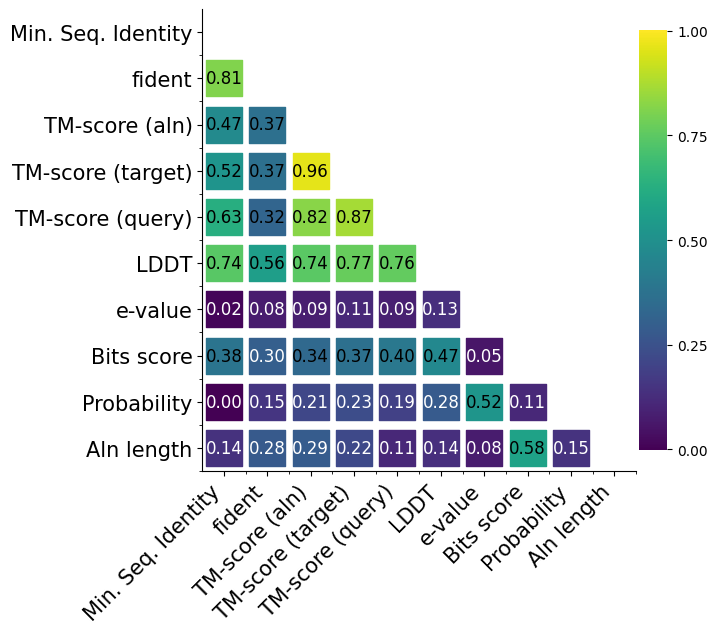

In [133]:
# Structural Similarity Metrics

f_spec = ['min_sequence_identity',
            'fident_struct',
            'alntmscore_struct', 'ttmscore_struct', 'qtmscore_struct',
            'lddt_struct', 
            'evalue_struct', 'bits_struct',
            'prob_struct', 'alnlen_struct',
            ]

# Calculate the correlation matrix
corr_matrix = paralog_pairs[f_spec].corr().abs()

# Prepare data for the heatmap
corr = corr_matrix.reset_index().melt(id_vars='index')
corr.columns = ['x', 'y', 'value']

# Plot the heatmap
heatmap(
    fig_size = 6,
    scale = 700,
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value'],
    x_labels=f_spec,
    y_labels=f_spec,
    feature_labels=feature_labels
)

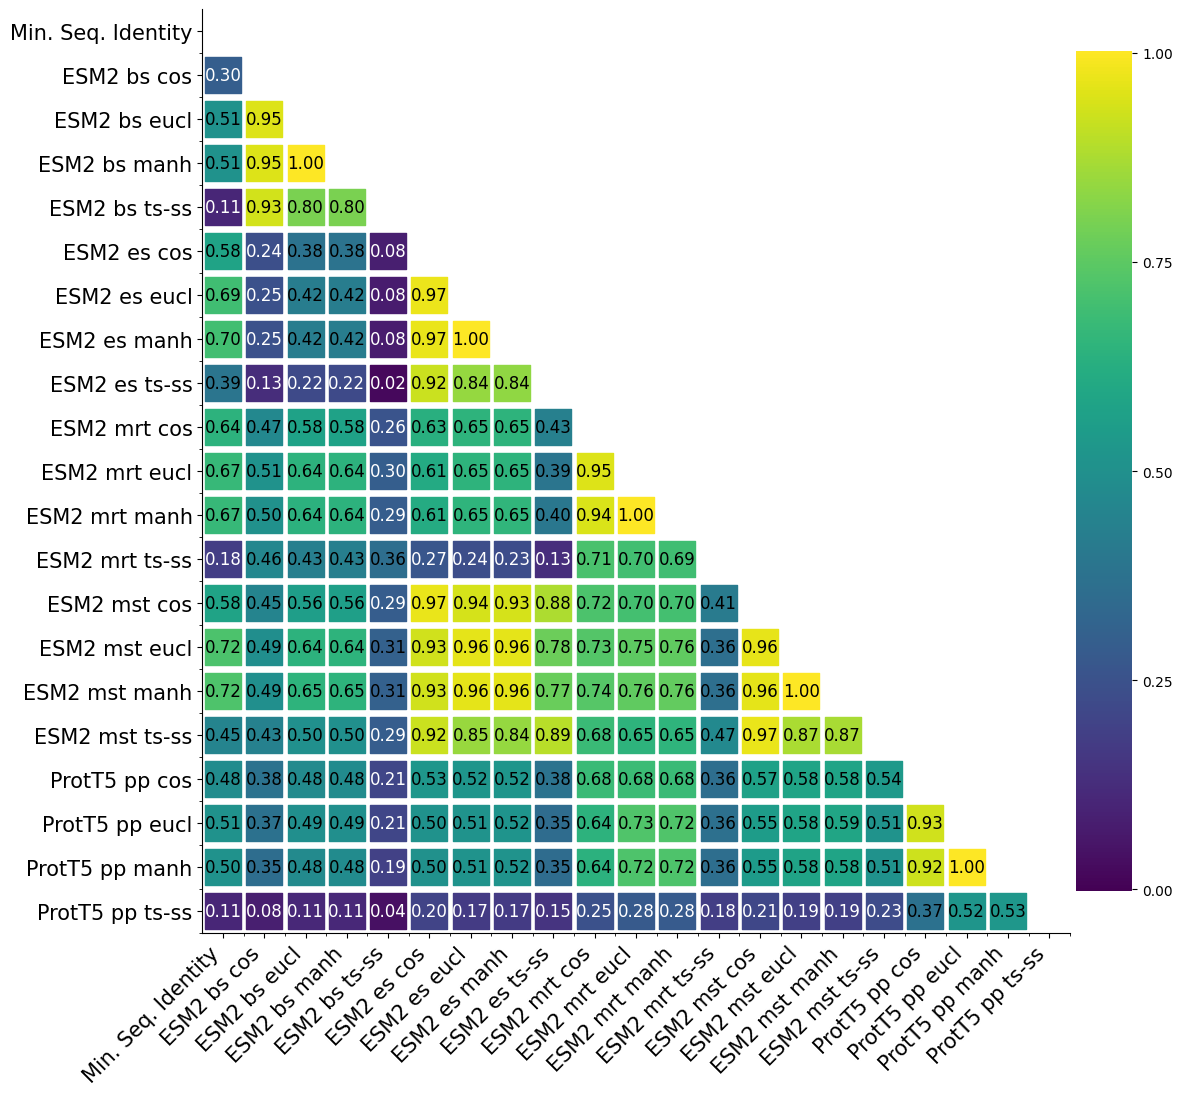

In [134]:
# Protein Language Model Embeddings Metrics

f_spec = ['min_sequence_identity',
            'esm2_beginning_of_sequence_cosine',
            'esm2_beginning_of_sequence_euclidean','esm2_beginning_of_sequence_manhattan', 'esm2_beginning_of_sequence_ts_ss',
            'esm2_end_of_sequence_cosine',
            'esm2_end_of_sequence_euclidean', 'esm2_end_of_sequence_manhattan','esm2_end_of_sequence_ts_ss',
            'esm2_mean_of_residue_tokens_cosine',
            'esm2_mean_of_residue_tokens_euclidean', 'esm2_mean_of_residue_tokens_manhattan','esm2_mean_of_residue_tokens_ts_ss',
            'esm2_mean_of_special_tokens_cosine',
            'esm2_mean_of_special_tokens_euclidean','esm2_mean_of_special_tokens_manhattan', 'esm2_mean_of_special_tokens_ts_ss',
            'ProtT5_per-protein_cosine', 
            'ProtT5_per-protein_euclidean', 'ProtT5_per-protein_manhattan', 'ProtT5_per-protein_ts_ss',  
                    ]

# Calculate the correlation matrix
corr_matrix = paralog_pairs[f_spec].corr().abs()

# Prepare data for the heatmap
corr = corr_matrix.reset_index().melt(id_vars='index')
corr.columns = ['x', 'y', 'value']

# Plot the heatmap
heatmap(
    fig_size = 12,
    scale = 700,
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value'],
    x_labels=f_spec,
    y_labels=f_spec,
    feature_labels=feature_labels
)


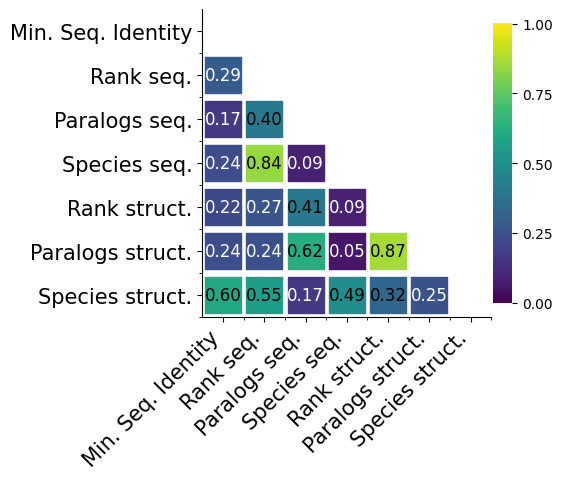

In [135]:
# Similarity Search Metrics

f_spec = ['min_sequence_identity',
            'rank_seq', 'selfSP_seq', 'taxid_seq' ,
            'rank_struct', 'selfSP_struct', 'taxid_struct', 
            ]

# Calculate the correlation matrix
corr_matrix = paralog_pairs[f_spec].corr().abs()

# Prepare data for the heatmap
corr = corr_matrix.reset_index().melt(id_vars='index')
corr.columns = ['x', 'y', 'value']

# Plot the heatmap
heatmap(
    fig_size = 4,
    scale = 700,
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value'],
    x_labels=f_spec,
    y_labels=f_spec,
    feature_labels=feature_labels
)

# Define the label to use as the function to predict

## Using `fet_ppi_overlap` to approximate functional divergence

In [136]:

# Bioplex annotations
Interactome_paralog_pairs = paralog_pairs.copy(deep=True) 

# Define thresholds
hit_thres = -np.log10(0.05/int(Interactome_paralog_pairs.shape[0]))
non_hit_thres = -np.log10(0.05)

print(f'Hit threshold: {hit_thres}')
print(f'Non-hit threshold: {non_hit_thres}')

# Build a functional divergence column
# Initialize the new column with NaNs
Interactome_paralog_pairs['same_func_ppi'] = np.nan
# Apply conditions
Interactome_paralog_pairs.loc[Interactome_paralog_pairs['fet_ppi_overlap'] >= hit_thres, 'same_func_ppi'] = True
Interactome_paralog_pairs.loc[Interactome_paralog_pairs['fet_ppi_overlap'] <= non_hit_thres, 'same_func_ppi'] = False
        
# Count the occurrences of True, False, and calculate the number of NaN values
true_count = Interactome_paralog_pairs['same_func_ppi'].sum()  # True values are treated as 1
false_count = len(Interactome_paralog_pairs) - true_count - Interactome_paralog_pairs['same_func_ppi'].isna().sum()  # Total length minus True and NaN
nan_count = Interactome_paralog_pairs['same_func_ppi'].isna().sum()
# Print the distribution
print(f"In the column 'same_func_ppi', there are {true_count} True values, {false_count} False values, and {nan_count} NaN values.")

# Drop rows with NaN in same_func_ppi
Interactome_paralog_pairs = Interactome_paralog_pairs.dropna(subset='same_func_ppi')
# Insure it is a boolean feature
Interactome_paralog_pairs['same_func_ppi'] = Interactome_paralog_pairs['same_func_ppi'].astype(bool)
print('Num same function (ppi based):', sum(Interactome_paralog_pairs.same_func_ppi), '/', Interactome_paralog_pairs.shape[0])

# Save Dataset
Interactome_paralog_pairs.to_csv(f'ens111_yeast_Interactome.csv', index=False)

Hit threshold: 4.914660430589222
Non-hit threshold: 1.3010299956639813
In the column 'same_func_ppi', there are 388 True values, 3501 False values, and 219 NaN values.
Num same function (ppi based): 388 / 3889


/var/folders/3q/2xywjjx10gz19vlr9tn3r25m0000gn/T/ipykernel_5522/3286615579.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Interactome_paralog_pairs.loc[Interactome_paralog_pairs['fet_ppi_overlap'] >= hit_thres, 'same_func_ppi'] = True


## Using `Synthetic Lethality` (SGA NxN) to approximate functional divergence

In [137]:
# Use SGA NxN (2016) to define SL pairs
screen_paralog_pairs = paralog_pairs.copy(deep=True) 

# Load the SGA dataset
sga_fn = '/Users/olivierdennler/Documents/data/SLI_2023/yeast_559292/2016_Data_File_S1_Raw_genetic_interaction_datasets_Pair-wise_interaction_format_2/SGA_NxN.txt'
# Load only the necessary columns, if you know them in advance, it's better for memory management
use_cols = ['Query Strain ID', 'Query allele name', 'Array Strain ID', 'Genetic interaction score (ε)', 'P-value']
df_sga = pd.read_csv(sga_fn, sep="\t", usecols=use_cols)
# Convert data types if necessary (e.g., converting IDs to string if not automatically recognized)
df_sga['Query Strain ID'] = df_sga['Query Strain ID'].astype(str)
df_sga['Array Strain ID'] = df_sga['Array Strain ID'].astype(str)

# Create a sorted_gene_pair key
df_sga['sorted_gene_pair'] = df_sga.apply(
    lambda x: '_'.join(sorted([x['Query Strain ID'].split('_')[0], x['Array Strain ID'].split('_')[0]])),
    axis=1
    )
    
# Sort by 'Genetic interaction score (ε)' and drop duplicates
df_sga = df_sga.sort_values('Genetic interaction score (ε)').drop_duplicates(subset='sorted_gene_pair', keep='first')

# Merge df_sga with depmap_pairs on sorted_gene_pair
screen_paralog_pairs = pd.merge(screen_paralog_pairs, df_sga, on='sorted_gene_pair', how='left')

# Drop NaN genetic interactions/P-value/Seq id 
screen_paralog_pairs = screen_paralog_pairs.dropna(subset=['Genetic interaction score (ε)', 'P-value', 'min_sequence_identity'])

# Define SL based on conditions
screen_paralog_pairs['SL'] = (screen_paralog_pairs['Genetic interaction score (ε)'] <= -0.08) & (screen_paralog_pairs['P-value'] <= 0.05)

# Optionally, clean up or reduce memory footprint
del df_sga  # Delete to free up memory if no longer needed

# Drop rows with NaN in depmap
screen_paralog_pairs = screen_paralog_pairs.dropna(subset=['SL'])

# Print the number of rows after dropping NaN
print(f"Number of rows after dropping SL NaN: {screen_paralog_pairs.shape[0]}")
print('Num SL:', sum(screen_paralog_pairs.SL), '/', screen_paralog_pairs.shape[0])

# Save Datasets
screen_paralog_pairs.to_csv(f'ens111_yeast_SL.csv', index=False)


Number of rows after dropping SL NaN: 2008
Num SL: 218 / 2008


## Using `BPO, MFO, CCO` GO semantic similarity to approximate functional divergence

In [138]:
# For GO as labels

fn_gogo_features_pairs = Path('/Users/olivierdennler/Documents/data/SLI_2023/GO/gogo_ens111_yeast_data.csv').resolve()
# gogo GO semantic similarities
go_features = pd.read_csv(fn_gogo_features_pairs)
paralog_pairs = pd.merge(paralog_pairs.copy(deep=True) , go_features, how='left', on='sorted_gene_pair', suffixes=('', '_y'))
paralog_pairs.drop(paralog_pairs.filter(regex='_y$').columns, axis=1, inplace=True)


def build_go_dataset(paralog_pairs, go_t):
    '''
    Build a labelled dataset where paralog pairs are annotated has sharing common function or not
    Based on GO semantic distances 
    go_t being an ontology category among BPO, CCO and MFO
    '''

    print(f'=> Builfing {go_t} Gene Ontology dataset ...')

    # Drop rows with NaN for GO term
    paralog_pairs = paralog_pairs.dropna(subset=go_t)

    # Use define thres / based on https://github.com/MEGA-GO/MegaGO
    low_threshold, high_threshold = 0.3, 0.9
    print(f'Low threshold: {low_threshold}')
    print(f'High threshold: {high_threshold}')

    # Initialize the new column with NaNs
    paralog_pairs['same_func_go'] = np.nan

    # Assign True to the top 10% values
    paralog_pairs.loc[paralog_pairs[go_t] >= high_threshold, 'same_func_go'] = True

    # Assign False to the bottom 10% values
    paralog_pairs.loc[paralog_pairs[go_t] <= low_threshold, 'same_func_go'] = False

    # The rest will remain NaN as initialized

    # Count the occurrences of True, False, and calculate the number of NaN values
    true_count = paralog_pairs['same_func_go'].sum()  # True values are treated as 1
    false_count = len(paralog_pairs) - true_count - paralog_pairs['same_func_go'].isna().sum()  # Total length minus True and NaN
    nan_count = paralog_pairs['same_func_go'].isna().sum()
    # Print the distribution
    print(f"In the column 'same_func_go', there are {true_count} True values, {false_count} False values, and {nan_count} NaN values.")

    # Drop rows with NaN in same_func_ppi
    paralog_pairs = paralog_pairs.dropna(subset='same_func_go')
    # Insure it is a boolean feature
    paralog_pairs['same_func_go'] = paralog_pairs['same_func_go'].astype(bool)
    print(f'Num same function ({go_t} based):', sum(paralog_pairs.same_func_go), '/', paralog_pairs.shape[0])

    # Use it as label to predict 
    paralog_pairs['same_func_ppi'] = paralog_pairs['same_func_go']

    # Return the newly built dataset
    return paralog_pairs




# Build one dataset for each 
BPO_paralog_pairs = build_go_dataset(paralog_pairs, 'BPO')
MFO_paralog_pairs = build_go_dataset(paralog_pairs, 'MFO')
CCO_paralog_pairs = build_go_dataset(paralog_pairs, 'CCO')

# Save Datasets
BPO_paralog_pairs.to_csv(f'ens111_yeast_BPO.csv', index=False)
MFO_paralog_pairs.to_csv(f'ens111_yeast_MFO.csv', index=False)
CCO_paralog_pairs.to_csv(f'ens111_yeast_CCO.csv', index=False)


=> Builfing BPO Gene Ontology dataset ...
Low threshold: 0.3
High threshold: 0.9
In the column 'same_func_go', there are 336 True values, 172 False values, and 1064 NaN values.
Num same function (BPO based): 336 / 508
=> Builfing MFO Gene Ontology dataset ...
Low threshold: 0.3
High threshold: 0.9
In the column 'same_func_go', there are 495 True values, 67 False values, and 764 NaN values.
Num same function (MFO based): 495 / 562
=> Builfing CCO Gene Ontology dataset ...
Low threshold: 0.3
High threshold: 0.9
In the column 'same_func_go', there are 513 True values, 57 False values, and 839 NaN values.
Num same function (CCO based): 513 / 570


/var/folders/3q/2xywjjx10gz19vlr9tn3r25m0000gn/T/ipykernel_5522/1567179008.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paralog_pairs['same_func_go'] = np.nan
/var/folders/3q/2xywjjx10gz19vlr9tn3r25m0000gn/T/ipykernel_5522/1567179008.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  paralog_pairs.loc[paralog_pairs[go_t] >= high_threshold, 'same_func_go'] = True
/var/folders/3q/2xywjjx10gz19vlr9tn3r25m0000gn/T/ipykernel_5522/1567179008.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer